---
title: NIGnets Showcase
subtitle: Fitting shapes using NIGnets at Full Power
date: 2025-03-02
---

We now fit NIGnets at full power to target shapes. That is, Injective Networks powered by Auxilliary
Networks and Monotonic Networks with all boosters on (skip connections!).

In [2]:
# Basic imports
import torch
from torch import nn
import geosimilarity as gs
from NIGnets import NIGnet
from NIGnets.monotonic_nets import SmoothMinMaxNet

from assets.utils import automate_training, plot_curves

We will use the following network architecture for PreAux nets in this showcase.

In [3]:
class PreAuxNet(nn.Module):
    def __init__(self, layer_count, hidden_dim):
        super().__init__()

        # Pre-Auxilliary net needs closed transform to get same r at theta = 0, 2pi
        self.closed_transform = lambda t: torch.hstack([
            torch.cos(2 * torch.pi * t),
            torch.sin(2 * torch.pi * t)
        ])

        layers = [nn.Linear(2, hidden_dim), nn.BatchNorm1d(hidden_dim), nn.PReLU()]
        for i in range(layer_count):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.PReLU())
        layers.append(nn.Linear(hidden_dim, 1))
        layers.append(nn.ReLU())

        self.forward_stack = nn.Sequential(*layers)
    
    def forward(self, t):
        unit_circle = self.closed_transform(t) # Rows are cos(theta), sin(theta)
        r = self.forward_stack(unit_circle)
        x = r * unit_circle # Each row is now r*cos(theta), r*sin(theta)
        return x

## Circle and Square

Training Circle Net:
Epoch: [   1/1000]. Loss:    0.547675
Epoch: [ 200/1000]. Loss:    0.000109
Epoch: [ 400/1000]. Loss:    0.000033
Epoch: [ 600/1000]. Loss:    0.000014
Epoch: [ 800/1000]. Loss:    0.000733
Epoch: [1000/1000]. Loss:    0.000004
Training Square Net:
Epoch: [   1/1000]. Loss:    0.664601
Epoch: [ 200/1000]. Loss:    0.000638
Epoch: [ 400/1000]. Loss:    0.000184
Epoch: [ 600/1000]. Loss:    0.000132
Epoch: [ 800/1000]. Loss:    0.000060
Epoch: [1000/1000]. Loss:    0.000046


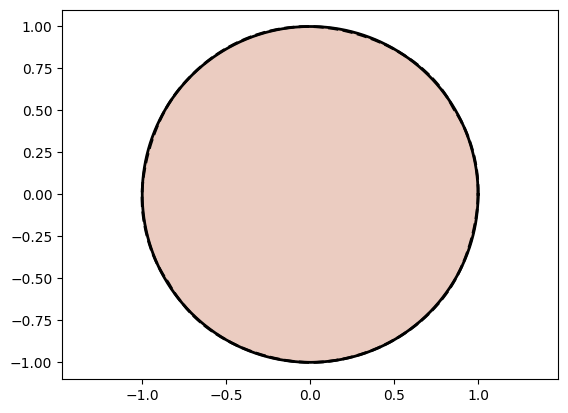

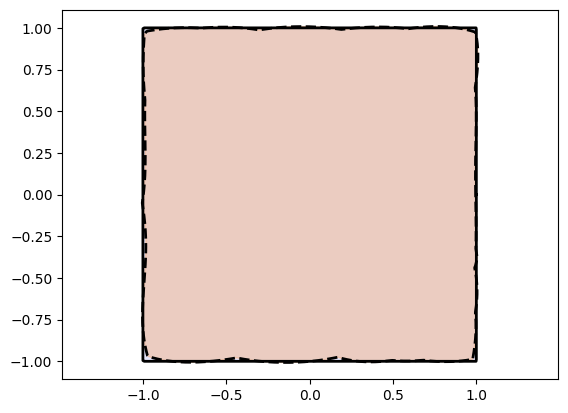

In [4]:
from assets.shapes import circle, square

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_circle = circle(num_pts)
Xt_square = square(num_pts)

# Initialize networks to learn the target shapes and train
preaux_net = PreAuxNet(layer_count = 2, hidden_dim = 5)
monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 3, nodes_per_group = 3)
circle_net = NIGnet(layer_count = 3, preaux_net = preaux_net, monotonic_net = monotonic_net)
square_net = NIGnet(layer_count = 3, preaux_net = preaux_net, monotonic_net = monotonic_net)

print('Training Circle Net:')
automate_training(
    model = circle_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_circle,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)
print('Training Square Net:')
automate_training(
    model = square_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_square,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)

# Get final curve represented by the networks
Xc_circle = circle_net(t)
Xc_square = square_net(t)

# Plot the curves
plot_curves(Xc_circle, Xt_circle)
plot_curves(Xc_square, Xt_square)

## Stanford Bunny

Epoch: [    1/10000]. Loss:    0.422331
Epoch: [ 2000/10000]. Loss:    0.000279
Epoch: [ 4000/10000]. Loss:    0.000144
Epoch: [ 6000/10000]. Loss:    0.000112
Epoch: [ 8000/10000]. Loss:    0.000091
Epoch: [10000/10000]. Loss:    0.000081


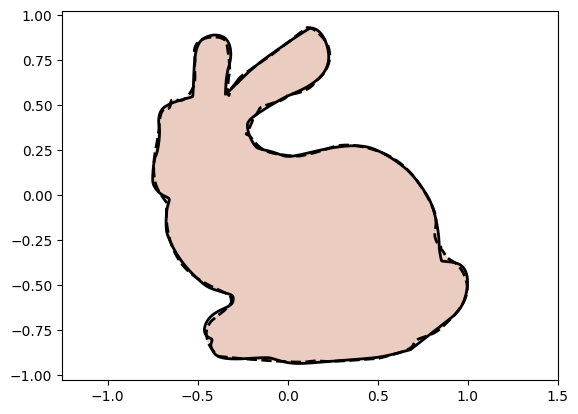

In [5]:
from assets.shapes import stanford_bunny

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = stanford_bunny(num_pts)

preaux_net = PreAuxNet(layer_count = 2, hidden_dim = 10)
monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 6, nodes_per_group = 6)
nig_net = NIGnet(layer_count = 5, preaux_net = preaux_net, monotonic_net = monotonic_net)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Heart

Epoch: [    1/10000]. Loss:    0.473060
Epoch: [ 2000/10000]. Loss:    0.000009
Epoch: [ 4000/10000]. Loss:    0.000007
Epoch: [ 6000/10000]. Loss:    0.000005
Epoch: [ 8000/10000]. Loss:    0.000005
Epoch: [10000/10000]. Loss:    0.000005


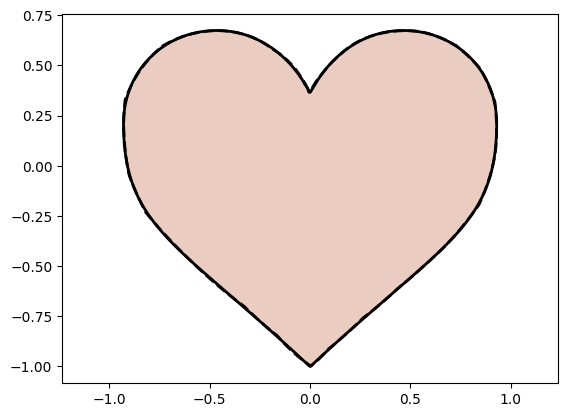

In [10]:
from assets.shapes import heart

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = heart(num_pts)

preaux_net = PreAuxNet(layer_count = 2, hidden_dim = 10)
monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 6, nodes_per_group = 6)
nig_net = NIGnet(layer_count = 3, preaux_net = preaux_net, monotonic_net = monotonic_net)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Hand

Epoch: [    1/10000]. Loss:    0.952776
Epoch: [ 2000/10000]. Loss:    0.000325
Epoch: [ 4000/10000]. Loss:    0.000087
Epoch: [ 6000/10000]. Loss:    0.000067
Epoch: [ 8000/10000]. Loss:    0.000060
Epoch: [10000/10000]. Loss:    0.000056


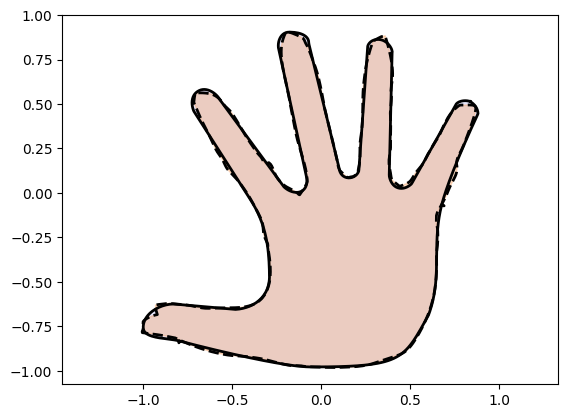

In [11]:
from assets.shapes import hand

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = hand(num_pts)

preaux_net = PreAuxNet(layer_count = 2, hidden_dim = 10)
monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 10, nodes_per_group = 10)
nig_net = NIGnet(layer_count = 5, preaux_net = preaux_net, monotonic_net = monotonic_net)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Puzzle Piece

Epoch: [    1/10000]. Loss:    0.439700
Epoch: [ 2000/10000]. Loss:    0.000248
Epoch: [ 4000/10000]. Loss:    0.000118
Epoch: [ 6000/10000]. Loss:    0.000070
Epoch: [ 8000/10000]. Loss:    0.000052
Epoch: [10000/10000]. Loss:    0.000038


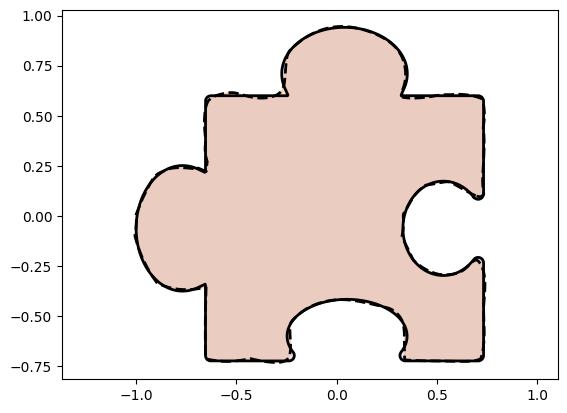

In [12]:
from assets.shapes import puzzle_piece

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = puzzle_piece(num_pts)

monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 10, nodes_per_group = 10)
nig_net = NIGnet(layer_count = 5, preaux_net = preaux_net, monotonic_net = monotonic_net)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Airplane

Epoch: [    1/10000]. Loss:    0.622391
Epoch: [ 2000/10000]. Loss:    0.000191
Epoch: [ 4000/10000]. Loss:    0.000135
Epoch: [ 6000/10000]. Loss:    0.000092
Epoch: [ 8000/10000]. Loss:    0.000069
Epoch: [10000/10000]. Loss:    0.000062


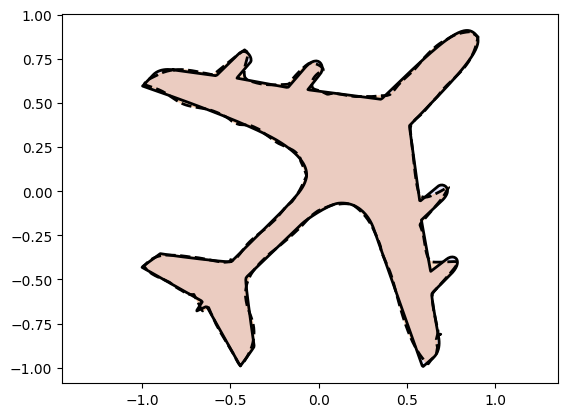

In [15]:
from assets.shapes import airplane

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = airplane(num_pts)

preaux_net = PreAuxNet(layer_count = 2, hidden_dim = 25)
monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 10, nodes_per_group = 10)
nig_net = NIGnet(layer_count = 5, preaux_net = preaux_net, monotonic_net = monotonic_net)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)